# Setup Image Dataset with PyTorch

This is the sample code of loading the MNIST dataset. You need to have the Pytorch successfull installed.

There is also sample code to manually construct a simple neural network and carry out the feedforward process.

In [8]:
# Import necessary packages

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

#import helper

import matplotlib.pyplot as plt

## 1. Load Images

Now we're going to build a larger network that can solve a (formerly) difficult problem, identifying text in an image. Here we'll use the MNIST dataset which consists of greyscale handwritten digits. Each image is 28x28 pixels, you can see a sample below

<img src='assets/mnist.png'>

Our goal is to build a neural network that can take one of these images and predict the digit in the image.

First up, we need to get our dataset. This is provided through the `torchvision` package. The code below will download the MNIST dataset, then create training and test datasets for us. The dataset's name is MNIST, this code downloads that dataset to a local folder of your choice, in this example, it is ~/.pytorch/MNIST_dadta/.

In [12]:
### Run this cell

from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

## 2. Datasets and Batches

We have the training data loaded into `trainset`, and the dataset is loaded batches (`trainloader`). We make that an iterator with `iter(trainloader)`. Later, we'll use this to loop through the dataset for training, like

```python
for image, label in trainloader:
    ## do things with images and labels
```

You'll notice I created the `trainloader` with a batch size of 64, and `shuffle=True`. The batch size is the number of images we get in one iteration from the data loader and pass through our network, often called a *batch*. And `shuffle=True` tells it to shuffle the dataset every time we start going through the data loader again. But here I'm just grabbing the first batch so we can check out the data. We can see below that `images` is just a tensor with size `(64, 1, 28, 28)`. So there are 64 images per batch, with every image having 1 color channel(monochrom, gray scale), and of size 28x28.

In [14]:
print('Total number of images in the trainset:', len(trainset))
print('Total number of batches:', len(trainloader))
dataiter = iter(trainloader)
images, labels = dataiter.__next__()
print('Data type of images:', type(images))
print('Shape of images:', images.shape)
print('Shape of labels:', labels.shape)

Total number of images in the trainset: 60000
Total number of batches: 938
Data type of images: <class 'torch.Tensor'>
Shape of images: torch.Size([64, 1, 28, 28])
Shape of labels: torch.Size([64])


## 3. Visualize the Images

This is what one of the images looks like. `i` can be 0 to 63

tensor(8)
torch.Size([784])
torch.Size([784])
torch.Size([64, 784])


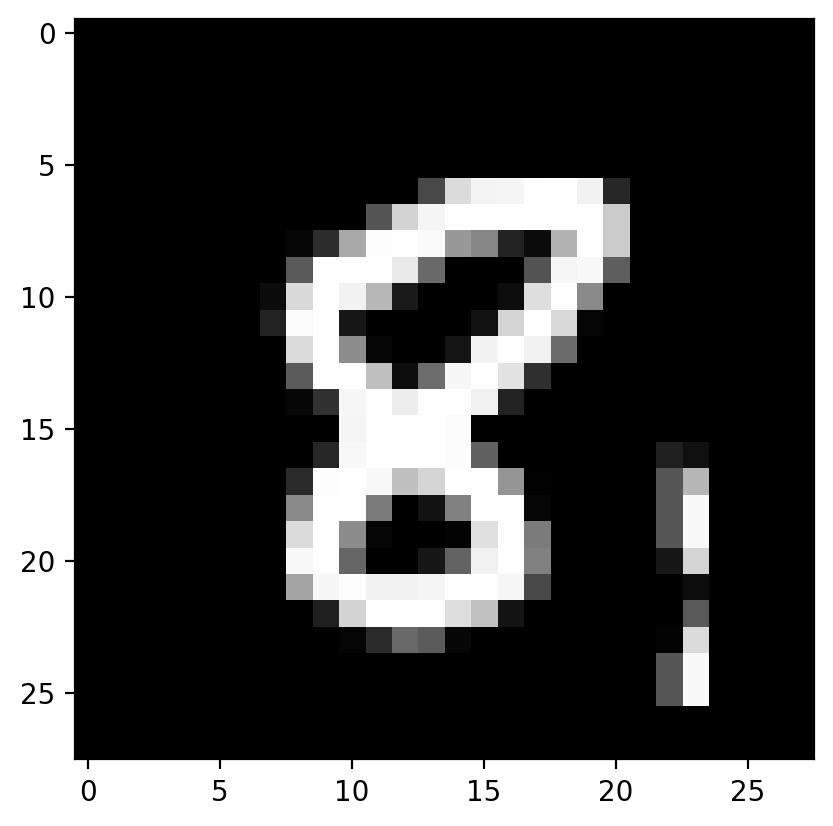

In [89]:
i = 6
plt.imshow(images[i].numpy().squeeze(), cmap='Greys_r');
print(labels[i])
print(images[i].flatten().shape)
print(torch.flatten(images[i]).shape)
print(images.view(images.shape[0], -1).shape)

## 5. More Experiment with DataLoader

DataLoader is the PyTorch API that prepares the traning data (`trainloader`) for us

Here is more about DataLoader. Try to play with this code, find out:
- how to control the total number of images you want to use for training
- how to configure the batch size

In [40]:
for images, labels in trainloader:
    print('images.shape: {}, labels.shape: {}'.format(images.shape, labels.shape))
    break;

# The following is to illustrate the use of dataloader, with batch_size and drop_last
from torch.utils.data import Dataset, DataLoader
class MyDataset(Dataset):
    def __init__(self, size):
        self.x = torch.randn(size, 1)
    
    def __getitem__(self, index):
        return self.x[index]

    def __len__(self):
        return len(self.x)

dataset = MyDataset(1001)
data_loader = DataLoader(dataset, batch_size=10)
len(data_loader)
for batch_idx, data in enumerate(data_loader):
    if (batch_idx>95):
        print ('batch idx{}, batch len {}'.format(batch_idx, len(data)))

print ('Here is if we drop the last one while loading:')

data_loader = DataLoader(dataset, batch_size=10, drop_last=True)
len(data_loader)
for batch_idx, data in enumerate(data_loader):
    if (batch_idx>95):
        print ('batch idx{}, batch len {}'.format(batch_idx, len(data)))


images.shape: torch.Size([64, 1, 28, 28]), labels.shape: torch.Size([64])
batch idx96, batch len 10
batch idx97, batch len 10
batch idx98, batch len 10
batch idx99, batch len 10
batch idx100, batch len 1
Here is if we drop the last one while loading:
batch idx96, batch len 10
batch idx97, batch len 10
batch idx98, batch len 10
batch idx99, batch len 10


## 6. Manual Construction of a Neural Network

Experiment with manually implementation of setting weight matrices and using them for matrix multiplication to compute the prediction. No training is carried out here, this is just to show how the feedforward process is done.

The networks you've seen so far are called *fully-connected* or *dense* networks. Each unit in one layer is connected to each unit in the next layer. In fully-connected networks, the input to each layer must be a one-dimensional vector (which can be stacked into a 2D tensor as a batch of multiple examples). However, our images are 28x28 2D tensors, so we need to convert them into 1D vectors. Thinking about sizes, we need to convert the batch of images with shape `(64, 1, 28, 28)` to a have a shape of `(64, 784)`, 784 is 28 times 28. This is typically called *flattening*, we flattened the 2D images into 1D vectors.

Previously you built a network with one output unit. Here we need **10 output units**, one for each digit. We want our network to predict the digit shown in an image, so what we'll do is calculate probabilities that the image is of any one digit or class. This ends up being a discrete probability distribution over the classes (digits) that tells us the most likely class for the image. That means we need 10 output units for the 10 classes (digits). We'll see how to convert the network output into a probability distribution next.

> **Exercise:** Flatten the batch of images `images`. Then build a multi-layer network with 784 input units, 128 hidden units, and 10 output units using random tensors for the weights and biases. For now, use a sigmoid activation for the hidden layer. Leave the output layer without an activation, we'll add one that gives us a probability distribution next.

In [83]:
## Your solution
torch.manual_seed(7) # Set the random seed so things are predictable

# Define the size of each layer in our network
n_input = 28*28      # Number of input units, must match number of input features
n_hidden = 128       # Number of hidden units 
n_output = 10        # Number of output units

# Weights for inputs to hidden layer
W1 = torch.randn(n_input, n_hidden)
# Weights for hidden layer to output layer
W2 = torch.randn(n_hidden, n_output)

# and bias terms for hidden and output layers
B1 = torch.randn((1, n_hidden))
B2 = torch.randn((1, n_output))

def activation(x):
    return 1/(1+torch.exp(-x))

#Calculate the output of this network using matrix multiplication
def output(features, weights, bias): 
    x = torch.mm(features, weights) + bias 
    return activation(x)

# we need a 64x784 matrix from the original 64x1x28x28 Tensor
# images.view(rows, cols)
# rows = first dimension of images which is images.shape[0]
# cols = unkown-->flatten, which is -1
images_flatten = images.view(images.shape[0], -1) 
h = output(images_flatten, W1, B1)
print ('Hidden layer output shape:', h.shape)
out = output(h, W2, B2)
print ('Output layer shape:', out.shape)
# output of your network, should have shape (64,10)
print('Output of 64 images after feedforward:\n', out)

Hidden layer output shape: torch.Size([64, 128])
Output layer shape: torch.Size([64, 10])
Output of 64 images after feedforward:
 tensor([[1.5766e-04, 9.9993e-01, 1.5382e-02, 9.9080e-01, 9.9404e-01, 8.4481e-02,
         8.5304e-01, 9.9995e-01, 8.8996e-03, 6.9029e-05],
        [1.6258e-01, 9.9945e-01, 8.1529e-04, 9.8204e-01, 9.9997e-01, 9.2753e-01,
         2.5378e-01, 9.9465e-01, 2.0047e-01, 3.1440e-02],
        [1.1696e-03, 9.9980e-01, 8.3698e-01, 9.9999e-01, 1.0000e+00, 2.0215e-01,
         9.9871e-01, 9.9982e-01, 4.6173e-01, 2.8564e-01],
        [9.0173e-07, 1.0000e+00, 4.3697e-01, 9.9935e-01, 9.8236e-01, 1.2578e-01,
         9.9777e-01, 1.0000e+00, 5.4509e-04, 8.4487e-03],
        [1.6845e-05, 3.4269e-01, 9.1873e-01, 9.6197e-01, 9.6925e-01, 8.8037e-03,
         8.9672e-01, 9.9994e-01, 3.4675e-04, 3.2424e-04],
        [9.3654e-02, 8.9594e-01, 6.8771e-01, 5.8418e-01, 1.0000e+00, 3.6468e-01,
         5.7408e-02, 9.6170e-01, 9.2527e-01, 9.6029e-02],
        [2.4336e-03, 9.9793e-01, 7.8